In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('project01').getOrCreate()

In [0]:
from pyspark.sql import SQLContext

In [0]:
sqlContext = SQLContext(spark)

In [0]:
sqlContext

Out[95]: <pyspark.sql.context.SQLContext at 0x7f3fc31fb310>

In [0]:
test_sdf = spark.read.format("csv").load("dbfs:/FileStore/shared_uploads/L00157133@student.lyit.ie/test.csv",inferSchema = True, header = True)
train_sdf = spark.read.format("csv").load("dbfs:/FileStore/shared_uploads/L00157133@student.lyit.ie/train.csv", inferSchema = True, header = True)

In [0]:
train_sdf.show(2)


+---+--------------+--------------+----------+--------------+----------+
 Id|Province_State|Country_Region| Date|ConfirmedCases|Fatalities|
+---+--------------+--------------+----------+--------------+----------+
 1| null| Afghanistan|2020-01-22| 0.0| 0.0|
 2| null| Afghanistan|2020-01-23| 0.0| 0.0|
+---+--------------+--------------+----------+--------------+----------+
only showing top 2 rows

In [0]:
test_sdf.show(2)

+----------+--------------+--------------+----------+
ForecastId|Province_State|Country_Region| Date|
+----------+--------------+--------------+----------+
 1| null| Afghanistan|2020-03-26|
 2| null| Afghanistan|2020-03-27|
+----------+--------------+--------------+----------+
only showing top 2 rows

In [0]:
train_sdf.printSchema()

root
-- Id: integer (nullable = true)
-- Province_State: string (nullable = true)
-- Country_Region: string (nullable = true)
-- Date: string (nullable = true)
-- ConfirmedCases: double (nullable = true)
-- Fatalities: double (nullable = true)

In [0]:
test_sdf.printSchema()

root
-- ForecastId: integer (nullable = true)
-- Province_State: string (nullable = true)
-- Country_Region: string (nullable = true)
-- Date: string (nullable = true)

In [0]:
#Countries and Day - Train

In [0]:

train_sdf.createOrReplaceTempView('train_sdf')
sDF = spark.sql('SELECT Country_Region FROM train_sdf GROUP BY Country_Region')
print('Total Countries: ',len(sDF.toPandas()['Country_Region']))
sDF = spark.sql("SELECT Date FROM train_sdf GROUP BY Date")
print('Total Days: ',len(sDF.toPandas()['Date']))

Total Countries: 180
Total Days: 77

In [0]:
#Countries and Day - Test

In [0]:
test_sdf.createOrReplaceTempView('test_sdf')
sDF = spark.sql('SELECT Country_Region FROM test_sdf GROUP BY Country_Region')
print('Total Countries: ',len(sDF.toPandas()['Country_Region']))
sDF = spark.sql('SELECT Date FROM test_sdf GROUP BY Date')
print('Total Days: ',len(sDF.toPandas()['Date']))

Total Countries: 180
Total Days: 43

In [0]:
# Confirmed Cases but No Fatalities Sorted

In [0]:
sDF = spark.sql("SELECT Date, count(ConfirmedCases) FROM train_sdf WHERE ConfirmedCases>0 AND Fatalities=0 GROUP BY Date ORDER BY Date ASC")
sDF.show()

+----------+---------------------+
 Date|count(ConfirmedCases)|
+----------+---------------------+
2020-01-22| 27|
2020-01-23| 34|
2020-01-24| 35|
2020-01-25| 38|
2020-01-26| 39|
2020-01-27| 40|
2020-01-28| 41|
2020-01-29| 43|
2020-01-30| 46|
2020-01-31| 50|
2020-02-01| 51|
2020-02-02| 50|
2020-02-03| 50|
2020-02-04| 50|
2020-02-05| 48|
2020-02-06| 48|
2020-02-07| 47|
2020-02-08| 45|
2020-02-09| 42|
2020-02-10| 41|
+----------+---------------------+
only showing top 20 rows

Out[104]:

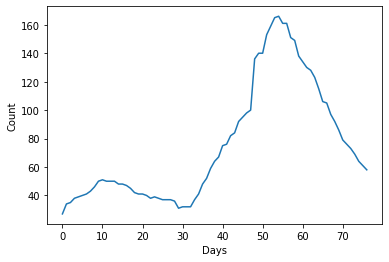

[<matplotlib.lines.Line2D at 0x7f3fc3533fd0>]

In [0]:
# Plot Days - Count
import matplotlib.pyplot as plt
plt.xlabel("Days")
plt.ylabel("Count")
plt.plot(sDF.toPandas()["count(ConfirmedCases)"])

Out[105]:

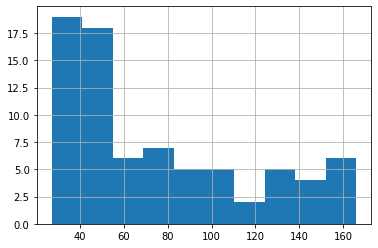

<matplotlib.axes._subplots.AxesSubplot at 0x7f3fc321fad0>

In [0]:
# Histogram Plot
sDF.toPandas()["count(ConfirmedCases)"].hist()


In [0]:
sDF.toPandas()["count(ConfirmedCases)"].describe()

Out[106]: count 77.000000
mean 75.584416
std 42.192962
min 27.000000
25% 41.000000
50% 59.000000
75% 100.000000
max 166.000000
Name: count(ConfirmedCases), dtype: float64

In [0]:
# Fatalities Count 

In [0]:
sDF = spark.sql("SELECT Date, count(Fatalities) FROM train_sdf WHERE Fatalities>0 GROUP BY Date ORDER BY Date ASC")
sDF.show()

+----------+-----------------+
 Date|count(Fatalities)|
+----------+-----------------+
2020-01-22| 1|
2020-01-23| 2|
2020-01-24| 3|
2020-01-25| 3|
2020-01-26| 5|
2020-01-27| 7|
2020-01-28| 7|
2020-01-29| 8|
2020-01-30| 8|
2020-01-31| 8|
2020-02-01| 9|
2020-02-02| 10|
2020-02-03| 10|
2020-02-04| 11|
2020-02-05| 13|
2020-02-06| 13|
2020-02-07| 15|
2020-02-08| 17|
2020-02-09| 20|
2020-02-10| 21|
+----------+-----------------+
only showing top 20 rows

In [0]:
# Fatalities Days and Count

Out[108]:

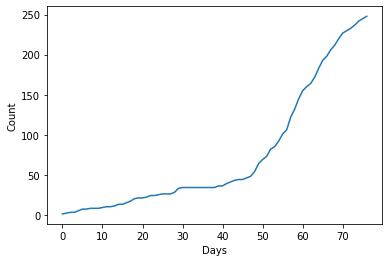

[<matplotlib.lines.Line2D at 0x7f3fc31a7fd0>]

In [0]:
plt.xlabel("Days")
plt.ylabel("Count")
plt.plot(sDF.toPandas()["count(Fatalities)"])

In [0]:
#Fatalities and Count Histogram

Out[109]:

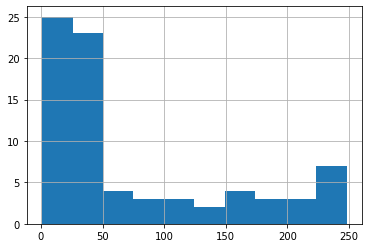

<matplotlib.axes._subplots.AxesSubplot at 0x7f3fc3168310>

In [0]:
sDF.toPandas()["count(Fatalities)"].hist()


In [0]:
sDF.toPandas()["count(Fatalities)"].describe()


Out[110]: count 77.000000
mean 75.051948
std 78.030172
min 1.000000
25% 21.000000
50% 34.000000
75% 122.000000
max 248.000000
Name: count(Fatalities), dtype: float64

In [0]:
sDF = spark.sql("SELECT Country_Region, count(ConfirmedCases) FROM train_sdf WHERE ConfirmedCases>0 GROUP BY Country_Region")
sDF.toPandas()["count(ConfirmedCases)"].describe()

Out[111]: count 180.000000
mean 64.438889
std 220.315623
min 8.000000
25% 24.000000
50% 33.000000
75% 42.000000
max 2522.000000
Name: count(ConfirmedCases), dtype: float64

In [0]:
# Confirmed Cases - Top 5

In [0]:
sDF = spark.sql("SELECT Country_Region, count(ConfirmedCases) FROM train_sdf WHERE ConfirmedCases>0 GROUP BY Country_Region ORDER BY count(ConfirmedCases) DESC LIMIT 5").show()

+--------------+---------------------+
Country_Region|count(ConfirmedCases)|
+--------------+---------------------+
 China| 2522|
 US| 1517|
 Australia| 416|
 Canada| 394|
 France| 328|
+--------------+---------------------+

In [0]:
# Confirmed Cases - Bottom 5

In [0]:
sDF = spark.sql("SELECT Country_Region, count(ConfirmedCases) FROM train_sdf WHERE ConfirmedCases>0 GROUP BY Country_Region ORDER BY count(ConfirmedCases) ASC LIMIT 5").show()

+--------------+---------------------+
Country_Region|count(ConfirmedCases)|
+--------------+---------------------+
 Sierra Leone| 8|
 Burundi| 8|
 Botswana| 9|
 MS Zaandam| 11|
 Burma| 12|
+--------------+---------------------+

In [0]:
sDF = spark.sql("SELECT Country_Region, count(Fatalities) FROM train_sdf WHERE Fatalities>0 GROUP BY Country_Region")
sDF.toPandas()["count(Fatalities)"].describe()

Out[114]: count 146.000000
mean 39.582192
std 158.831281
min 1.000000
25% 11.000000
50% 18.000000
75% 26.750000
max 1662.000000
Name: count(Fatalities), dtype: float64

In [0]:
# Fatalities Count - Top 5 Countries

In [0]:
sDF = spark.sql("SELECT Country_Region, count(Fatalities) FROM train_sdf WHERE Fatalities>0 GROUP BY Country_Region ORDER BY count(Fatalities) DESC LIMIT 5").show()

+--------------+-----------------+
Country_Region|count(Fatalities)|
+--------------+-----------------+
 China| 1662|
 US| 1003|
 Canada| 122|
 Australia| 117|
 France| 110|
+--------------+-----------------+

In [0]:
# Fatalities Count - Bottom 5 Countries

In [0]:
sDF = spark.sql("SELECT Country_Region, count(Fatalities) FROM train_sdf WHERE Fatalities>0 GROUP BY Country_Region ORDER BY count(Fatalities) ASC LIMIT 5").show()

+-------------------+-----------------+
 Country_Region|count(Fatalities)|
+-------------------+-----------------+
Antigua and Barbuda| 1|
 Belize| 2|
 Benin| 2|
 Barbados| 3|
 Ethiopia| 3|
+-------------------+-----------------+

In [0]:
#Preprocessing
from pyspark.sql.types import *
from pyspark.sql.functions import *
test_df = test_sdf.withColumn("Date",unix_timestamp(test_sdf.Date,'yyyy-mm-dd'))
train_df = train_sdf.withColumn('Date',unix_timestamp(train_sdf.Date,'yyyy-mm-dd'))
test_df.show(1)
train_df.show(1)

+----------+--------------+--------------+----------+
ForecastId|Province_State|Country_Region| Date|
+----------+--------------+--------------+----------+
 1| null| Afghanistan|1579996980|
+----------+--------------+--------------+----------+
only showing top 1 row

+---+--------------+--------------+----------+--------------+----------+
 Id|Province_State|Country_Region| Date|ConfirmedCases|Fatalities|
+---+--------------+--------------+----------+--------------+----------+
 1| null| Afghanistan|1579651260| 0.0| 0.0|
+---+--------------+--------------+----------+--------------+----------+
only showing top 1 row

In [0]:
#Linear Regression

In [0]:
train_df.createOrReplaceTempView('train_df')
test_df.createOrReplaceTempView('test_df')


In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer


In [0]:
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import corr

In [0]:
N_DF = spark.sql("SELECT * FROM train_df WHERE Province_State IS NOT NULL")
Indexer = StringIndexer(inputCol="Province_State", outputCol="Province_StateIndex")
Indexed = Indexer.fit(N_NULL_DF).transform(N_NULL_DF)
Indexed.show()
Indexer = StringIndexer(inputCol="Country_Region", outputCol="Country_RegionIndex")
Indexed = Indexer.fit(indexed).transform(indexed)
Indexed.show()

+---+--------------------+--------------+----------+--------------+----------+-------------------+
 Id| Province_State|Country_Region| Date|ConfirmedCases|Fatalities|Province_StateIndex|
+---+--------------------+--------------+----------+--------------+----------+-------------------+
857|Australian Capita...| Australia|1579651260| 0.0| 0.0| 8.0|
858|Australian Capita...| Australia|1579737660| 0.0| 0.0| 8.0|
859|Australian Capita...| Australia|1579824060| 0.0| 0.0| 8.0|
860|Australian Capita...| Australia|1579910460| 0.0| 0.0| 8.0|
861|Australian Capita...| Australia|1579996860| 0.0| 0.0| 8.0|
862|Australian Capita...| Australia|1580083260| 0.0| 0.0| 8.0|
863|Australian Capita...| Australia|1580169660| 0.0| 0.0| 8.0|
864|Australian Capita...| Australia|1580256060| 0.0| 0.0| 8.0|
865|Australian Capita...| Australia|1580342460| 0.0| 0.0| 8.0|
866|Australian Capita...| Australia|1580428860| 0.0| 0.0| 8.0|
867|Australian Capita...| Australia|1577836920| 0.0| 0.0| 8.0|
868|Australian Capita...| Australia|1577923320| 0.0| 0.0| 8.0|
869|Australian Capita...| Australia|1578009720| 0.0| 0.0| 8.0|
870|Australian Capita...| Australia|1578096120| 0.0| 0.0| 8.0|
871|Australian Capita...| Australia|1578182520| 0.0| 0.0| 8.0|
872|Australian Capita...| Australia|1578268920| 0.0| 0.0| 8.0|
873|Australian Capita...| Australia|1578355320| 0.0| 0.0| 8.0|
874|Australian Capita...| Australia|1578441720| 0.0| 0.0| 8.0|
875|Australian Capita...| Australia|1578528120| 0.0| 0.0| 8.0|
876|Australian Capita...| Australia|1578614520| 0.0| 0.0| 8.0|
+---+--------------------+--------------+----------+--------------+----------+-------------------+
only showing top 20 rows

+---+--------------------+--------------+----------+--------------+----------+-------------------+-------------------+
 Id| Province_State|Country_Region| Date|ConfirmedCases|Fatalities|Province_StateIndex|Country_RegionIndex|
+---+--------------------+--------------+----------+--------------+----------+-------------------+-------------------+
857|Australian Capita...| Australia|1579651260| 0.0| 0.0| 8.0| 5.0|
858|Australian Capita...| Australia|1579737660| 0.0| 0.0| 8.0| 5.0|
859|Australian Capita...| Australia|1579824060| 0.0| 0.0| 8.0| 5.0|
860|Australian Capita...| Australia|1579910460| 0.0| 0.0| 8.0| 5.0|
861|Australian Capita...| Australia|1579996860| 0.0| 0.0| 8.0| 5.0|
862|Australian Capita...| Australia|1580083260| 0.0| 0.0| 8.0| 5.0|
863|Australian Capita...| Australia|1580169660| 0.0| 0.0| 8.0| 5.0|
864|Australian Capita...| Australia|1580256060| 0.0| 0.0| 8.0| 5.0|
865|Australian Capita...| Australia|1580342460| 0.0| 0.0| 8.0| 5.0|
866|Australian Capita...| Australia|1580428860| 0.0| 0.0| 8.0| 5.0|
867|Australian Capita...| Australia|1577836920| 0.0| 0.0| 8.0| 5.0|
868|Australian Capita...| Australia|1577923320| 0.0| 0.0| 8.0| 5.0|
869|Australian Capita...| Australia|1578009720| 0.0| 0.0| 8.0| 5.0|
870|Australian Capita...| Australia|1578096120| 0.0| 0.0| 8.0| 5.0|
871|Australian Capita...| Australia|1578182520| 0.0| 0.0| 8.0| 5.0|
872|Australian Capita...| Australia|1578268920| 0.0| 0.0| 8.0| 5.0|
873|Australian Capita...| Australia|1578355320| 0.0| 0.0| 8.0| 5.0|
874|Australian Capita...| Australia|1578441720| 0.0| 0.0| 8.0| 5.0|
875|Australian Capita...| Australia|1578528120| 0.0| 0.0| 8.0| 5.0|
876|Australian Capita...| Australia|1578614520| 0.0| 0.0| 8.0| 5.0|
+---+--------------------+--------------+----------+--------------+----------+-------------------+-------------------+
only showing top 20 rows

In [0]:
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Province_StateIndex', 'Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a linear regression model
lr = LinearRegression(featuresCol = 'features', labelCol='Fatalities', maxIter=100, tol=1e-6, fitIntercept=False,standardization=True, solver="auto", aggregationDepth=2,loss="huber", epsilon=1.35)
lr_model = lr.fit(train_df)
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lr_model.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
#trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("MAE: %f" % trainingSummary.meanAbsoluteError)
print("MSE: %f" % trainingSummary.meanSquaredError)
#print("r2: %f" % trainingSummary.r2)

In [0]:
confirmedcases_lr_predictions = lr_model.transform(test_df)


In [0]:
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Province_StateIndex', 'Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a linear regression model
lr = LinearRegression(featuresCol = 'features', labelCol='Fatalities', maxIter=100, tol=1e-6, fitIntercept=False,standardization=False, solver="auto", aggregationDepth=2,loss="huber", epsilon=1.35)
lr_model = lr.fit(train_df)
# Print the coefficients and intercept for linear regression
print("Coefficients: %s" % str(lr_model.coefficients))
print("Intercept: %s" % str(lr_model.intercept))
# Summarize the model over the training set and print out some metrics
trainingSummary = lr_model.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
#trainingSummary.residuals.show()
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("MAE: %f" % trainingSummary.meanAbsoluteError)
print("MSE: %f" % trainingSummary.meanSquaredError)
#print("r2: %f" % trainingSummary.r2)

In [0]:
fatalities_lr_predictions = lr_model.transform(test_df)


In [0]:
#Decision Tree - Confirmed Cases
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a Decison Tree model
dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='ConfirmedCases', maxDepth = 3, maxBins=1000)
dt_model = dt.fit(train_df)

In [0]:
confirmedcases_dt_predictions = dt_model.transform(test_df)


In [0]:
# Decision Tree - Fatalities
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a Decision Tree regression model
dt = DecisionTreeRegressor(featuresCol = 'features', labelCol='Fatalities', maxDepth = 3, maxBins=1000)
dt_model = dt.fit(train_df)


In [0]:
fatalities_dt_predictions = dt_model.transform(test_df)


In [0]:
# Random Forest - Confirmed Cases

# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a random forest model
rf = RandomForestRegressor(featuresCol = 'features', labelCol='ConfirmedCases', maxDepth = 3, maxBins=1000)
rf_model = rf.fit(train_df)

In [0]:
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
test_df = assembler.transform(test_indexed)
confirmedcases_rf_predictions = rf_model.transform(test_df)


In [0]:
# Random Forest - Fatalities

# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a random fores regression model
rf = RandomForestRegressor(featuresCol = 'features', labelCol='Fatalities', maxDepth = 3, maxBins=1000)
rf_model = rf.fit(train_df)


In [0]:

# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
test_df = assembler.transform(test_indexed)
fatalities_rf_predictions = rf_model.transform(test_df)

In [0]:
# Gradient Boosted Tree - Confirmed Tree
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a GBT regression model
rf = GBTRegressor(featuresCol = 'features', labelCol='ConfirmedCases', maxDepth = 3, maxBins=1000)
rf_model = rf.fit(train_df)

In [0]:
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
test_df = assembler.transform(test_indexed)
confirmedcases_rf_predictions = rf_model.transform(test_df)

In [0]:
# Gradient Boosted Tree - Fatalities


# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
train_df = assembler.transform(indexed)
# Fit a GBT regression model
rf = GBTRegressor(featuresCol = 'features', labelCol='Fatalities', maxDepth = 3, maxBins=1000)
rf_model = rf.fit(train_df)

In [0]:
# Create a vector representation for features
assembler = VectorAssembler(inputCols=['Country_RegionIndex', 'Date'],outputCol="features")
test_df = assembler.transform(test_indexed)
fatalities_rf_predictions = rf_model.transform(test_df)